In [ ]:
# import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Datadirectory="C://Users/elham/Desktop/"
classes=["closed_eye","open_eye"]

In [3]:
img_size=100
training_data=[]
def create_data():
    for category in classes:
        path=os.path.join(Datadirectory,category)
        print(path)
        class_num =classes.index(category)
        for img in os.listdir(path):
         
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
          

In [4]:
create_data()

/Users/mehreenhurroo/Desktop/Implementation/archive/closed_eye
/Users/mehreenhurroo/Desktop/Implementation/archive/open_eye


In [5]:
print(len(training_data))

48000


In [6]:
import random
random.shuffle(training_data)
X=[]
y=[]
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)


In [7]:
X.shape

(48000, 100, 100, 1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [10]:
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.1,random_state=0,stratify=y_train)

In [11]:
y_train.count(1)

17280

In [12]:
y_train.count(0)

17280

In [13]:
y_test.count(1)

4800

In [14]:
y_test.count(0)

4800

In [15]:
def preprocessing(img):
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    img_blur = cv2.GaussianBlur(img, (3,3), 0) 
    # Sobel Edge Detection
    sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
    sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
    sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

    edges = cv2.Canny(image=img, threshold1=30, threshold2=50) # Canny Edge Detection
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    img = cv2.morphologyEx(edges, cv2.MORPH_DILATE, kernel)
    return img


In [16]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [17]:
X_train=X_train/255.0

In [18]:
X_train[2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
X_validation=X_validation/255.0

In [20]:
X_test=X_test/255.0

In [17]:
cv2.imshow("Grayscale Image",X_train[random.randint(0,len(X_train)-1)])
cv2.waitKey(0)

27

In [21]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [22]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [23]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)

In [24]:
X_validation=X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [25]:
dataGen.fit(X_train)

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_train=np.array(y_train)

In [28]:
y_train.shape

(34560,)

In [29]:
noOfClasses=len(classes)

In [30]:
y_train=to_categorical(y_train,noOfClasses)

In [31]:
y_train.shape

(34560, 2)

In [32]:
y_validation=to_categorical(y_validation,noOfClasses)

In [33]:
y_test=to_categorical(y_test,noOfClasses)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

In [35]:
X_train.shape

(34560, 100, 100, 1)

In [36]:
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Dense

In [39]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation ='relu',input_shape = (100, 100,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [41]:
dataGen.fit(X_train)

In [43]:
batches=dataGen.flow(X_train,y_train,batch_size=20)

In [42]:
istory=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=50),validation_data=(X_validation,y_validation),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
692/692 [==============================] - 335s 484ms/step - loss: 0.3444 - accuracy: 0.8457 - val_loss: 0.1993 - val_accuracy: 0.9117
Epoch 2/20
692/692 [==============================] - 334s 482ms/step - loss: 0.2415 - accuracy: 0.8966 - val_loss: 0.1758 - val_accuracy: 0.9234
Epoch 3/20
692/692 [==============================] - 329s 476ms/step - loss: 0.2139 - accuracy: 0.9097 - val_loss: 0.1662 - val_accuracy: 0.9258
Epoch 4/20
692/692 [==============================] - 364s 526ms/step - loss: 0.1993 - accuracy: 0.9152 - val_loss: 0.1584 - val_accuracy: 0.9299
Epoch 5/20
692/692 [==============================] - 340s 491ms/step - loss: 0.1900 - accuracy: 0.9201 - val_loss: 0.1824 - val_accuracy: 0.9268
Epoch 6/20
692/692 [==============================] - 339s 489ms/step - loss: 0.1852 - accuracy: 0.9227 - val_loss: 0.1523 - val_accuracy: 0.9344
Epoch 7/20
692/692 [============================

In [43]:
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix 
y_predict = model.predict(X_test)

In [44]:
target_names = ['closed_eye','opened_eye']

In [45]:
y_test.shape

(9600, 2)

In [46]:
y_predict.shape

(9600, 2)

In [47]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

Confusion Matrix
[[4691  109]
 [ 408 4392]]


In [48]:
report = metrics.classification_report(y_test_arg, Y_pred,target_names=target_names)
print(report)

              precision    recall  f1-score   support

  closed_eye       0.92      0.98      0.95      4800
  opened_eye       0.98      0.92      0.94      4800

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


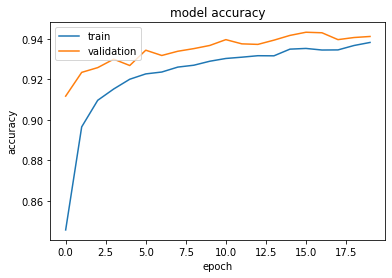

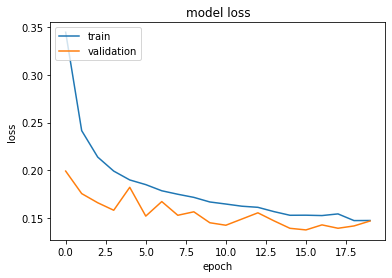

In [49]:
print(istory.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(istory.history['accuracy'])
plt.plot(istory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(istory.history['loss'])
plt.plot(istory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


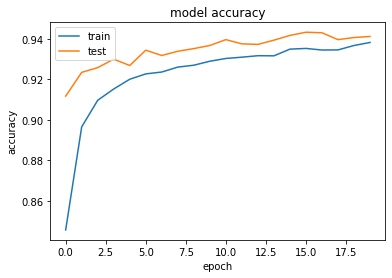

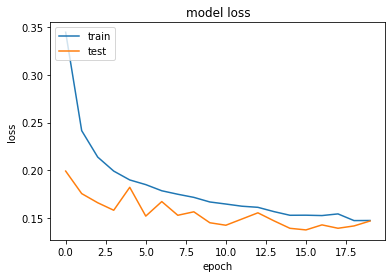

In [50]:
print(istory.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(istory.history['accuracy'])
plt.plot(istory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(istory.history['loss'])
plt.plot(istory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [51]:
import h5py
model.save('Trained_model_softbalanced.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


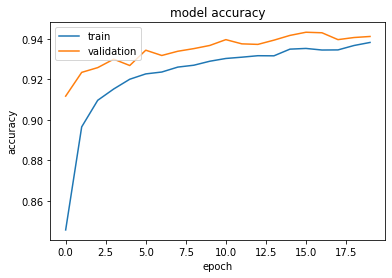

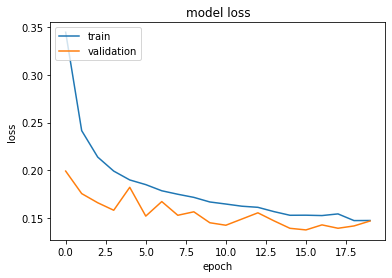

In [52]:
print(istory.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(istory.history['accuracy'])
plt.plot(istory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss

plt.plot(istory.history['loss'])
plt.plot(istory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

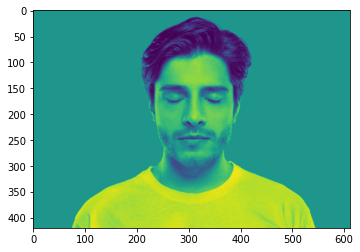

In [53]:
img_array=cv2.imread('/Users/mehreenhurroo/Downloads/istockphoto-1163491597-612x612.jpg')
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY))

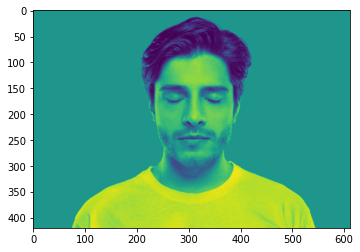

In [54]:
import cv2
  
image = cv2.imread('/Users/mehreenhurroo/Downloads/istockphoto-1163491597-612x612.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
cv2.imshow('Original image',image)
cv2.imshow('Gray image', gray)
plt.imshow(gray)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

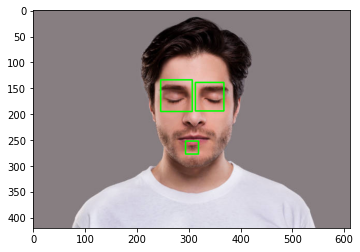

In [55]:
import cv2
  
image = cv2.imread('/Users/mehreenhurroo/Downloads/istockphoto-1163491597-612x612.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

not found


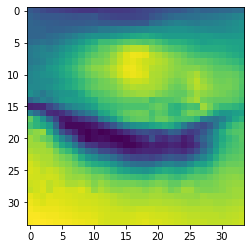

In [56]:
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=image[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("not found")
    else:
        for(ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2GRAY))


In [57]:
eyes_roi.shape

(34, 34, 3)

In [58]:
final_image=cv2.resize(eyes_roi,(100,100))

In [59]:


# Convert to graycsale
img_gray = cv2.cvtColor(final_image, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_gray, threshold1=30, threshold2=50) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img = cv2.morphologyEx(edges, cv2.MORPH_DILATE, kernel)
cv2.imshow('Morphological', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
img.shape

(100, 100)

In [61]:
img=img/255.0


In [62]:
img = np.expand_dims(img, axis=0)

In [63]:
img=img.reshape(img.shape[0], img.shape[1], img.shape[2],1)

In [66]:
predictions=model.predict(img)
classIndex=model.predict_classes(img)
probabilityValue=np.amax(predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [76]:
print(classIndex)

[0]


In [67]:
import numpy as np
import cv2

 

def getCalssName(classNo):
    if   classNo == 0: return 'Closed Eyes'
    elif classNo == 1: return 'Open Eyes'

In [68]:
 if probabilityValue>0.75:
        print(str(classIndex) + " "+ str(getCalssName(classIndex)))

[0] Closed Eyes


In [74]:
if probabilityValue>0.75:
    status= str(classIndex) + " "+ str(getCalssName(classIndex))

In [75]:
print(status)

[0] Closed Eyes


In [69]:

pred=model.predict(img)
pred


array([[0.77048516, 0.22951478]], dtype=float32)

In [70]:
probabilityValue=np.amax(pred)

In [71]:
probabilityValue

0.77048516

In [79]:
if pred[0][0]>0.75:
    print("closed")
elif pred[0][1]<0.75:
    print("open")
else:
    print("nothing")

closed


In [77]:
if classIndex==0:
    print("closed")
elif classIndex==1:
    print("open")
else:
    print("nothing")

closed


In [73]:
np.amin(pred)

0.22951478

In [80]:
targets = ['closed','open']

In [81]:
report = metrics.classification_report(y_test_arg, Y_pred,target_names=targets)
print(report)

              precision    recall  f1-score   support

      closed       0.92      0.98      0.95      4800
        open       0.98      0.92      0.94      4800

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



In [83]:
targetss = ['closed_eyes','open_eyes']

In [84]:
report = metrics.classification_report(y_test_arg, Y_pred,target_names=targetss)
print(report)

              precision    recall  f1-score   support

 closed_eyes       0.92      0.98      0.95      4800
   open_eyes       0.98      0.92      0.94      4800

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



In [85]:
report = metrics.classification_report(y_test_arg, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4800
           1       0.98      0.92      0.94      4800

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



In [86]:
targetss = ['Closed_eyes','Open_eyes']
report = metrics.classification_report(y_test_arg, Y_pred,target_names=targetss)
print(report)

              precision    recall  f1-score   support

 Closed_eyes       0.92      0.98      0.95      4800
   Open_eyes       0.98      0.92      0.94      4800

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600



In [87]:
targetss = ['Closed','Open']
report = metrics.classification_report(y_test_arg, Y_pred,target_names=targetss)
print(report)

              precision    recall  f1-score   support

      Closed       0.92      0.98      0.95      4800
        Open       0.98      0.92      0.94      4800

    accuracy                           0.95      9600
   macro avg       0.95      0.95      0.95      9600
weighted avg       0.95      0.95      0.95      9600

